results.csv

Este conjunto de datos tiene información de los ganadores de cada partido.

date: Fecha del partido
home_team: Equipo de casa
away_team: Equipo de visitante
home_score: Goles del equipo de casa
away_score: Goles del equipo de visitante
tournament: Nombre del torneo
city: Ciudad donde el partido se jugó
country: País donde se jugó el partido
neutral: Si el partido se jugó en un lugar neutral o no
Usaremos este conjunto de datos para responder las siguientes preguntas:

1. Tendencias históricas:

¿Cómo ha evolucionado el número de partidos jugados por año?
¿Existen diferencias significativas en los resultados entre sedes neutrales y no neutrales?
2. Resultados de partidos:

¿Cuál es la distribución de las diferencias de goles en los partidos?
¿Qué equipos tienen más victorias jugando como locales o visitantes?
¿Qué países albergan la mayor cantidad de partidos?

goalscorers.csv

Este conjunto de datos tiene información sobre los jugadores que anotaron goles en partidos internacionales junto a los minutos en los que metieron esos goles. El conjunto cuenta con las siguientes columnas:

date: Fecha del partido
home_team: Equipo de casa
away_team: Equipo de visitante
team: Equipo que anotó el gol
scorer: Jugador que anotó el gol
minute: Minuto en el que se anotó el gol
own_goal: El gol fue autogol
penalty: Si el gol fue desde un penal
Usaremos este conjunto de datos para responder las siguientes preguntas:

1. Patrones de anotación:

¿En qué minuto se marcan más goles?
¿Cuáles son los jugadores con más goles en el conjunto de datos?
2. Comparación por equipos:

¿Cantidad de partidos ganados, perdidos jugando en casa y de visitante?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_results = pd.read_csv('/content/results.csv')

In [ ]:
data_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
data_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47980 entries, 0 to 47979
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47980 non-null  object
 1   home_team   47980 non-null  object
 2   away_team   47980 non-null  object
 3   home_score  47980 non-null  int64 
 4   away_score  47980 non-null  int64 
 5   tournament  47980 non-null  object
 6   city        47980 non-null  object
 7   country     47980 non-null  object
 8   neutral     47980 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [ ]:
data_results.describe()

,home_score,away_score
count,47980.000000,47980.000000
mean,1.758691,1.182388
std,1.773369,1.400001
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
data_results[data_results['home_score'] == data_results['home_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
25413,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False


In [ ]:
data_results[data_results['away_score'] == data_results['away_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29033,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


In [ ]:
data_results.sort_values(by= 'home_score', ascending= False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
25413,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
8539,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,Tahiti,False
11903,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
25410,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
6567,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True
30506,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True
21946,1997-05-13,Kazakhstan,Guam,20,1,East Asian Games,Busan,South Korea,True
24170,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False
24083,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True
25072,2000-11-24,Iran,Guam,19,0,FIFA World Cup qualification,Tabriz,Iran,False


In [ ]:
data_results.sort_values(by= 'away_score', ascending= False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29033,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True
37749,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True
27334,2003-06-30,Sark,Isle of Wight,0,20,Island Games,Saint Martin,Guernsey,True
15908,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True
37754,2014-06-02,Darfur,South Ossetia,0,19,CONIFA World Football Cup,Östersund,Sweden,True
13794,1983-08-22,Niue,Papua New Guinea,0,19,South Pacific Games,Apia,Western Samoa,True
27396,2003-07-07,Kiribati,Vanuatu,0,18,South Pacific Games,Lautoka,Fiji,True
35878,2012-06-05,Darfur,Provence,0,18,Viva World Cup,Erbil,Iraq,True
27337,2003-07-01,Micronesia,New Caledonia,0,18,South Pacific Games,Suva,Fiji,True
5891,1963-09-06,Solomon Islands,Tahiti,0,18,South Pacific Games,Suva,Fiji,True


In [ ]:
data_results['result'] = data_results.apply(lambda x: 'Ganado' if x['home_score'] > x['away_score']
                                           else 'Empate' if x['home_score'] == x['away_score']
                                           else 'Perdio', axis=1)
data_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Ganado
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Ganado
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Ganado


In [ ]:
resultados_neutral = data_results.groupby(['neutral', 'result']).size().unstack()

<Axes: xlabel='neutral'>

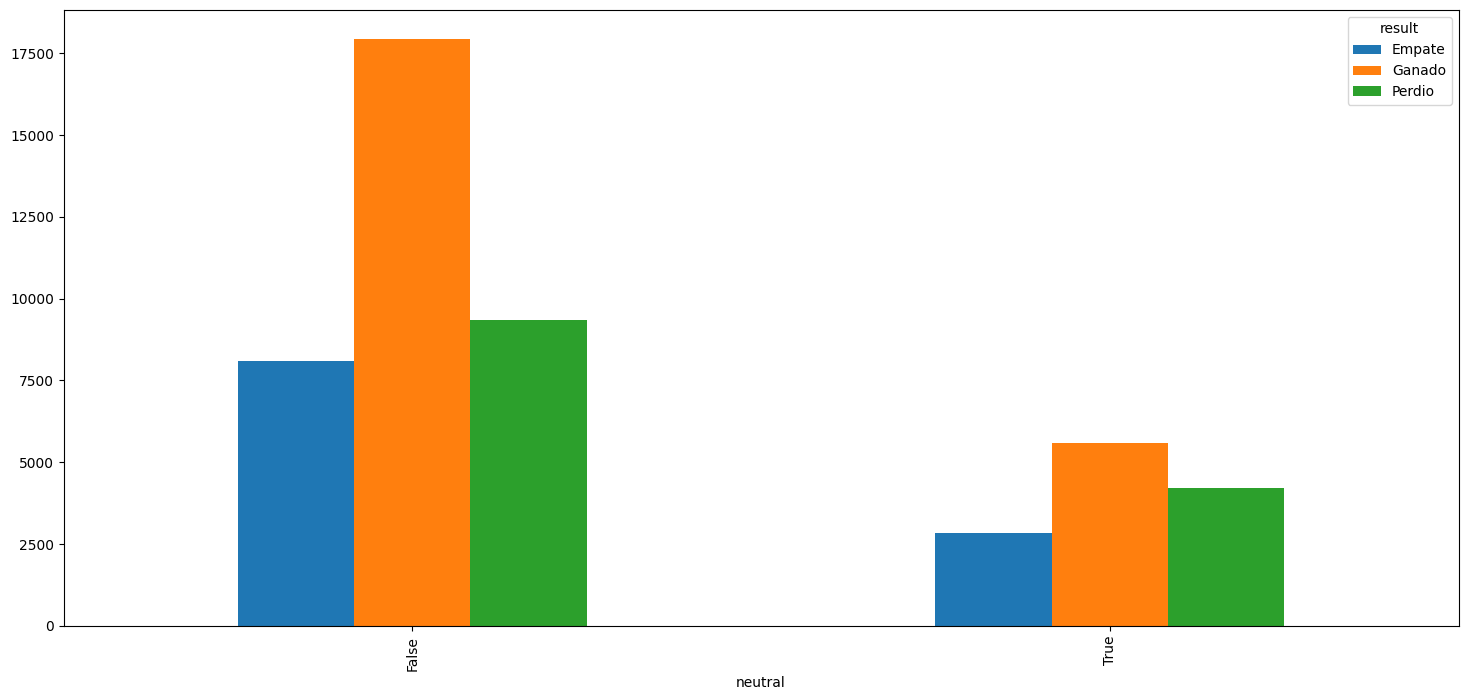

In [ ]:
resultados_neutral.plot(kind='bar', figsize=(18,8))

In [ ]:
data_results['year'] = pd.to_datetime(data_results['date']).dt.year
data_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Ganado,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Ganado,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Ganado,1876


In [ ]:
partidos_por_agno = data_results.groupby('year').size()
partidos_por_agno.tail(25)

,0
year,
2001,1031
2002,768
2003,947
2004,1079
2005,804
2006,842
2007,988
2008,1101
2009,925


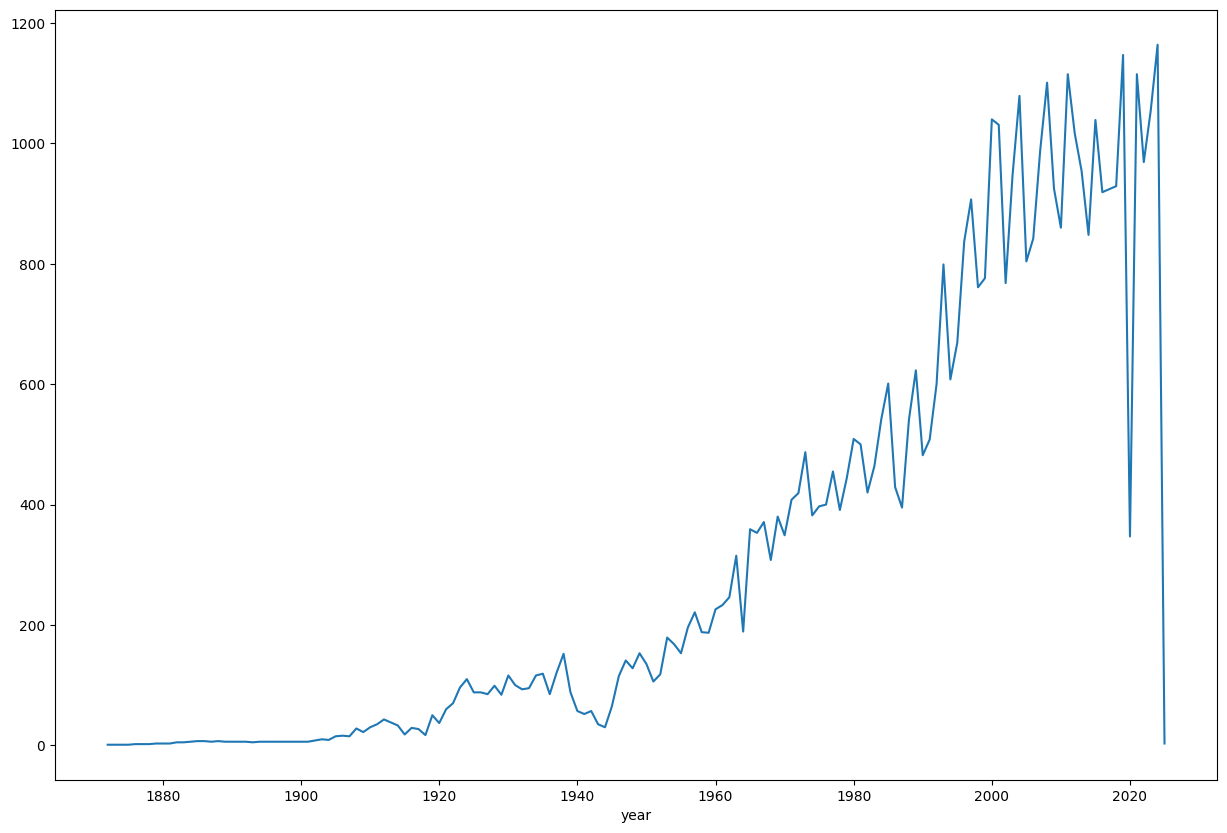

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=partidos_por_agno.index, y=partidos_por_agno.values)
plt.show()

In [ ]:
goles_casa_por_agno = data_results.groupby('year')['home_score'].sum()
goles_vistante_agno = data_results.groupby('year')['away_score'].sum()

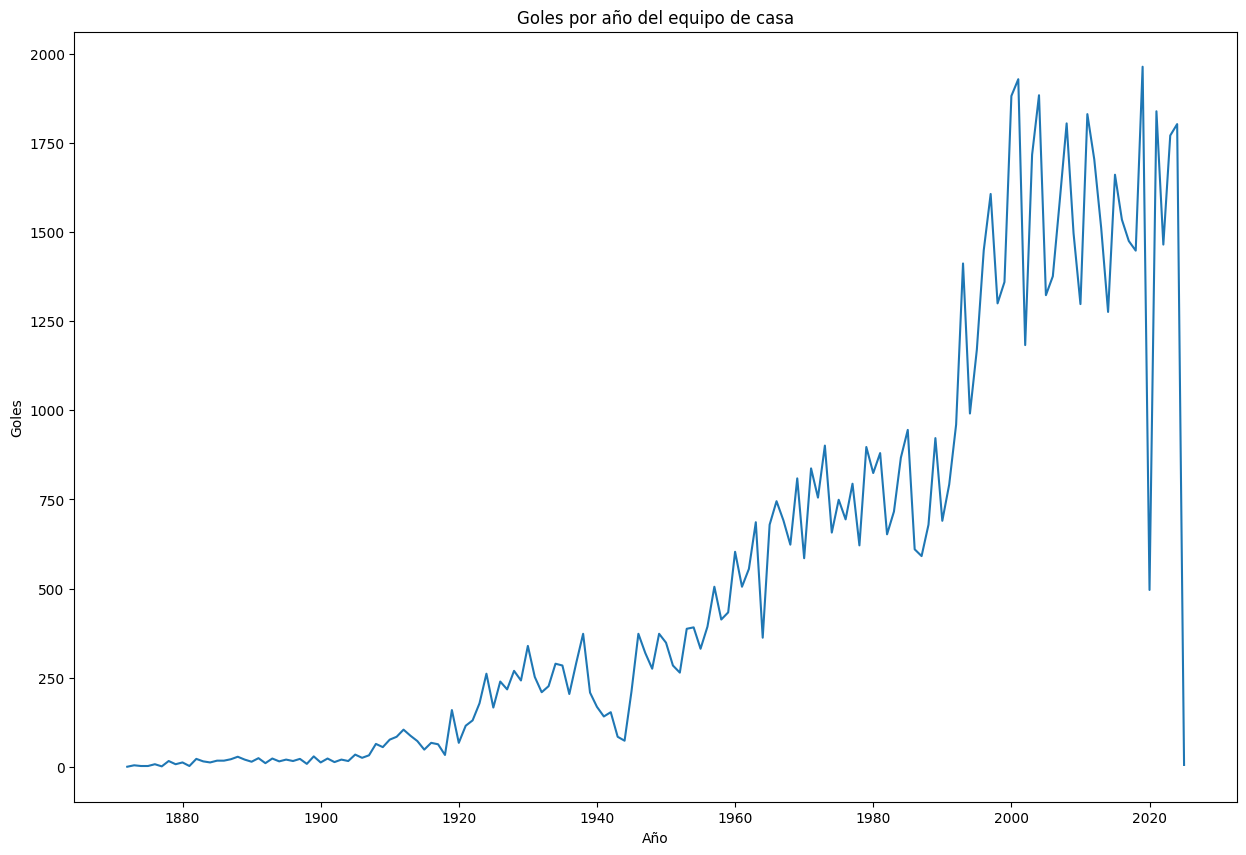

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=goles_casa_por_agno.index, y=goles_casa_por_agno.values)
plt.title('Goles por año del equipo de casa')
plt.ylabel('Goles')
plt.xlabel('Año')
plt.show()

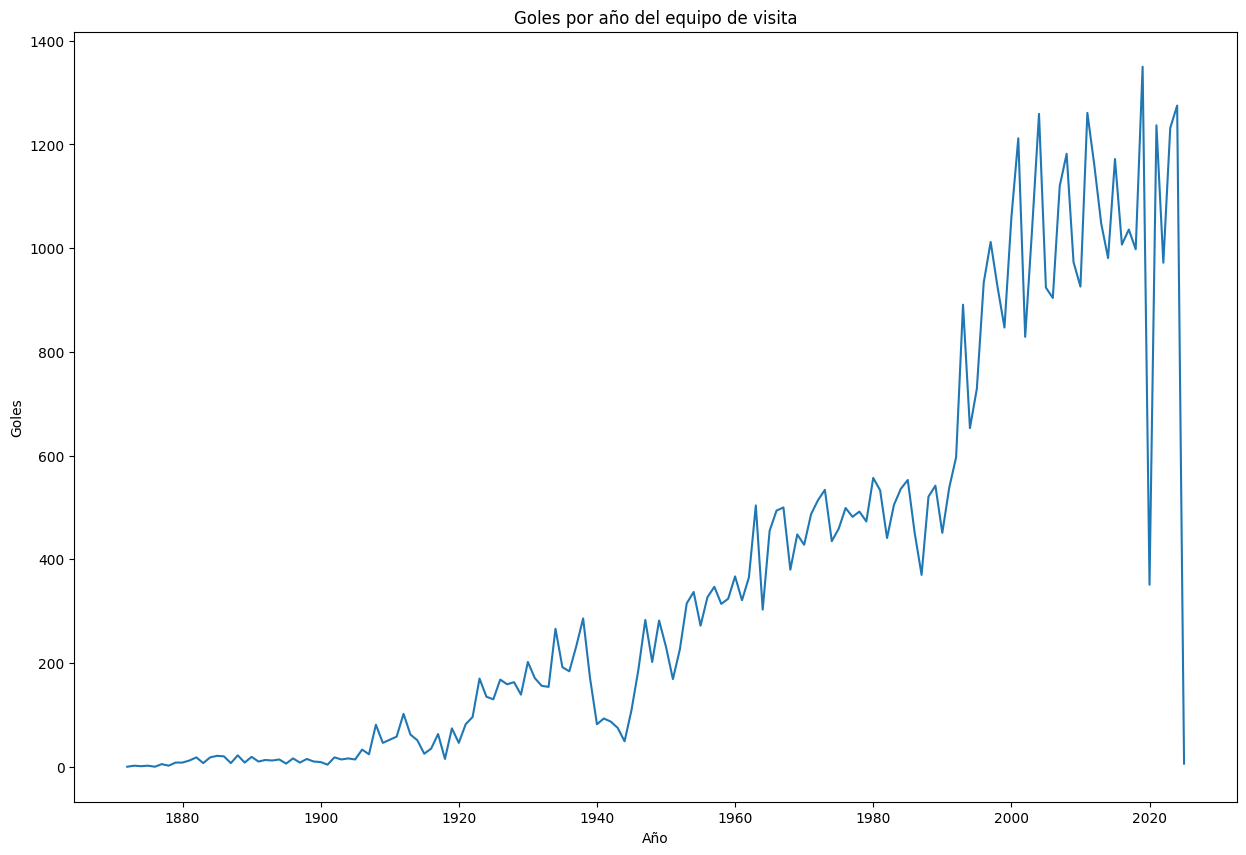

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=goles_vistante_agno.index, y=goles_vistante_agno.values)
plt.title('Goles por año del equipo de visita')
plt.ylabel('Goles')
plt.xlabel('Año')
plt.show()

In [ ]:
equipos_casa = data_results.groupby(['home_team', 'result']).size().unstack()
equipos_casa

result,Empate,Ganado,Perdio
home_team,,,
Abkhazia,8.0,11.0,3.0
Afghanistan,11.0,18.0,17.0
Albania,47.0,75.0,81.0
Alderney,1.0,1.0,46.0
Algeria,82.0,193.0,62.0
...,...,...,...
Yugoslavia,37.0,108.0,45.0
Zambia,94.0,182.0,52.0
Zanzibar,10.0,17.0,31.0


In [ ]:
equipos_casa.sort_values(by='Ganado', ascending=False).head(10)

result,Empate,Ganado,Perdio
home_team,,,
Brazil,114.0,431.0,60.0
Argentina,126.0,399.0,70.0
Mexico,132.0,344.0,108.0
Germany,115.0,338.0,92.0
England,118.0,335.0,87.0
South Korea,127.0,324.0,94.0
France,105.0,311.0,113.0
Sweden,107.0,310.0,107.0
Italy,126.0,304.0,54.0


In [ ]:
equipos_casa.sort_values(by='Perdio', ascending=False).head(10)

result,Empate,Ganado,Perdio
home_team,,,
Luxembourg,40.0,31.0,177.0
Finland,71.0,116.0,168.0
Malta,51.0,46.0,151.0
Northern Ireland,73.0,113.0,147.0
Norway,104.0,179.0,145.0
Switzerland,102.0,196.0,142.0
Singapore,76.0,148.0,138.0
Austria,87.0,229.0,136.0
Indonesia,86.0,207.0,131.0


In [ ]:
equipos_casa.sort_values(by='Empate', ascending=False).head(10)

result,Empate,Ganado,Perdio
home_team,,,
Mexico,132.0,344.0,108.0
South Korea,127.0,324.0,94.0
Italy,126.0,304.0,54.0
Argentina,126.0,399.0,70.0
England,118.0,335.0,87.0
Germany,115.0,338.0,92.0
Brazil,114.0,431.0,60.0
Malaysia,109.0,235.0,122.0
Hungary,109.0,275.0,105.0


In [ ]:
equipos_visita = data_results.groupby(['away_team', 'result']).size().unstack()
equipos_visita

result,Empate,Ganado,Perdio
away_team,,,
Abkhazia,5.0,2.0,3.0
Afghanistan,21.0,55.0,17.0
Albania,35.0,117.0,29.0
Alderney,1.0,82.0,4.0
Algeria,75.0,103.0,76.0
...,...,...,...
Yugoslavia,61.0,117.0,115.0
Zambia,107.0,173.0,173.0
Zanzibar,31.0,92.0,24.0


In [ ]:
equipos_visita.sort_values(by='Ganado', ascending=False).head(10)

result,Empate,Ganado,Perdio
away_team,,,
Finland,93.0,260.0,93.0
Uruguay,132.0,236.0,207.0
Paraguay,128.0,228.0,130.0
Switzerland,96.0,221.0,112.0
Chile,98.0,216.0,88.0
Sweden,123.0,209.0,225.0
Northern Ireland,85.0,208.0,67.0
Hungary,110.0,202.0,190.0
Thailand,106.0,200.0,92.0


In [ ]:
equipos_visita.sort_values(by='Perdio', ascending=False).head(10)

result,Empate,Ganado,Perdio
away_team,,,
England,139.0,118.0,279.0
Germany,97.0,122.0,250.0
Brazil,100.0,107.0,233.0
Sweden,123.0,209.0,225.0
Uruguay,132.0,236.0,207.0
South Korea,123.0,121.0,207.0
Hungary,110.0,202.0,190.0
Argentina,130.0,148.0,180.0
Russia,121.0,113.0,179.0


In [ ]:
equipos_visita.sort_values(by='Empate', ascending=False).head(10)

result,Empate,Ganado,Perdio
away_team,,,
England,139.0,118.0,279.0
Uruguay,132.0,236.0,207.0
Argentina,130.0,148.0,180.0
Paraguay,128.0,228.0,130.0
South Korea,123.0,121.0,207.0
Sweden,123.0,209.0,225.0
Russia,121.0,113.0,179.0
Poland,118.0,180.0,160.0
Italy,115.0,113.0,161.0


In [ ]:
data_results.value_counts('country').sort_values(ascending=False).head(10)

,count
country,
United States,1408
France,905
Malaysia,820
England,748
Thailand,708
Qatar,707
Germany,675
Sweden,671
United Arab Emirates,592


In [ ]:
data_results.value_counts('city').sort_values(ascending=False).head(10)

,count
city,
Kuala Lumpur,732
Bangkok,576
Doha,547
London,430
Budapest,429
Kuwait City,372
Montevideo,369
Vienna,358
Oslo,351


<function matplotlib.pyplot.show(close=None, block=None)>

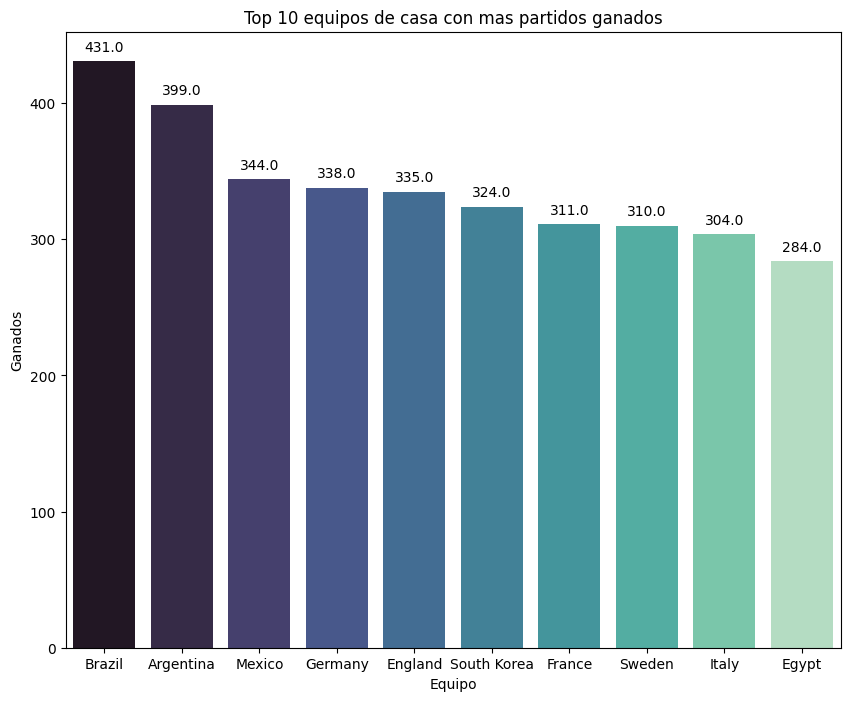

In [ ]:
top_equipos_casa = equipos_casa.sort_values(by='Ganado', ascending=False).head(10)
plt.figure(figsize=(10,8))
ax = sns.barplot(x=top_equipos_casa.index, y=top_equipos_casa['Ganado'], palette='mako')


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Top 10 equipos de casa con mas partidos ganados')
plt.xlabel('Equipo')
plt.ylabel('Ganados')
plt.show


In [ ]:
goalscorers_data = pd.read_csv('/content/goalscorers.csv')
goalscorers_data.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [ ]:
goalscorers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


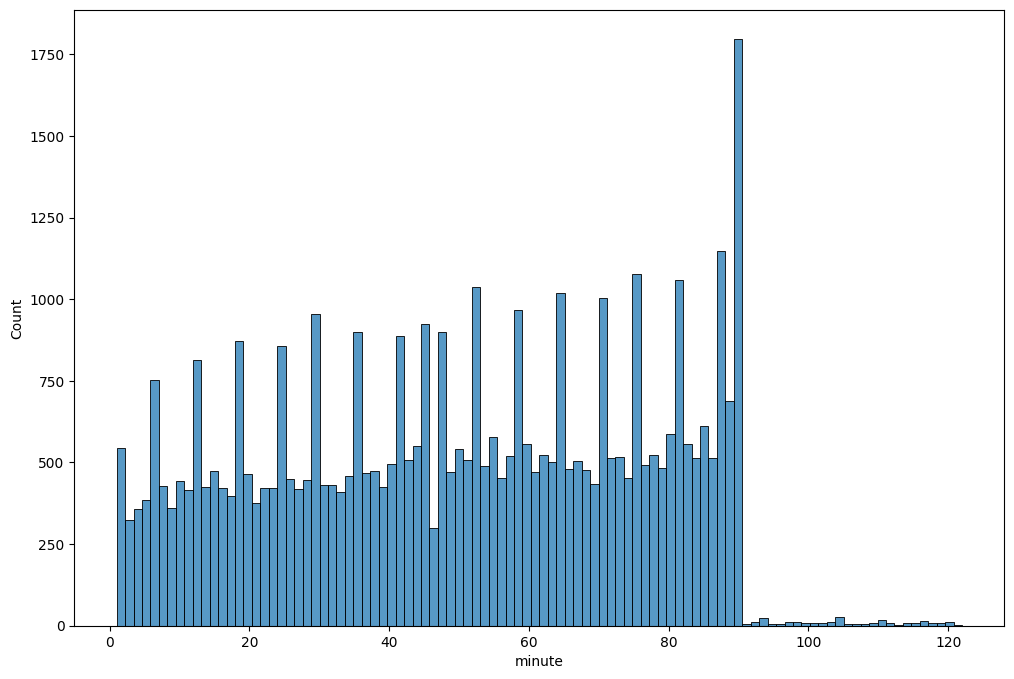

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(goalscorers_data['minute'], bins=100)
plt.show()

In [ ]:
filtered_minutes = goalscorers_data['minute'].dropna()
counts, bins = np.histogram(filtered_minutes, bins=100)

max_bin_index = np.argmax(counts)
min_range = bins[max_bin_index]
max_range = bins[max_bin_index + 1]

print(f'El minuto con mas goles es entre {min_range} y {max_range}')

El minuto con mas goles es entre 89.33 y 90.53999999999999


In [ ]:
counts[max_bin_index]

np.int64(2789)

In [ ]:
penalty_conteo = goalscorers_data.groupby('penalty').size()
penalty_conteo

,0
penalty,
False,41400
True,2962


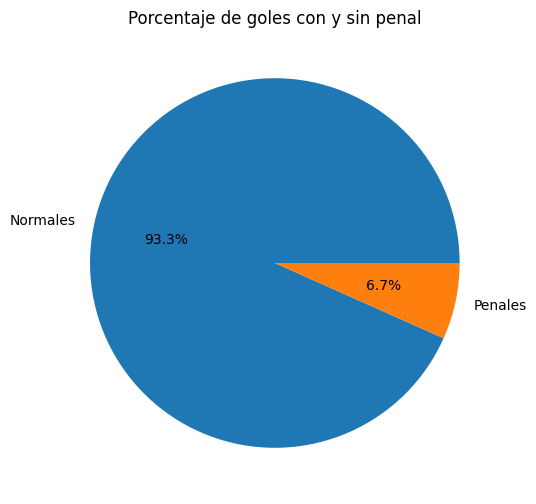

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(penalty_conteo, labels=['Normales', 'Penales'], autopct='%1.1f%%')
plt.title('Porcentaje de goles con y sin penal')
plt.show()

In [ ]:
goalscorers_data['scorer'].value_counts().head(10)

,count
scorer,
Cristiano Ronaldo,108
Robert Lewandowski,63
Romelu Lukaku,60
Harry Kane,58
Lionel Messi,55
Edin Džeko,50
Ali Daei,49
Miroslav Klose,48
Aleksandar Mitrović,47
